In [34]:
# Modules
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The main **core** of this notebook is to get a general introduction to the regression model.

I am going to use the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

## Variables:
- *age*: Age in years | int | Years
- *sex*: Patience's sex 1 = male, 0 = female | bool 
- *cp*: Chest pain type | int | 
    - (0) Value 1: Typical angina
    - (1) Value 2: Atypical angina
    - (2) Value 3: Non-anginal pain
    - (3) Value 4: Asyomptomatic
- *trestbps*: Resting blood pressure (in mm Hg on admission to the hospital) | int
- *chol*: Serum cholestoral in mg/dl  | int
- *fbs*: (fasting blood sugar > 120 mg/dl) | bool | (1 = true; 0 = false)
- *restecg*: Resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: Maximum heart rate achieved | int
- exang: exercise induced angina | bool | (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest | float
- slope: the slope of the peak exercise ST segment
    - 1: Upsloping
    - 2: flat
    - 3 downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal:
    - 3 = normal
    - 6 = fixed defect
    - 7 = reversable defect

In [50]:
  # fetch dataset 
Heart_Disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = Heart_Disease.data.features 
y = Heart_Disease.data.targets

# Binary response
binary_y = (y > 0).astype(int).rename({'num': 'response_binary'}, axis = 1)

# DataFrame for Analysis
df = pd.concat([X,binary_y, y], axis=1)


In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,response_binary
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# EDA

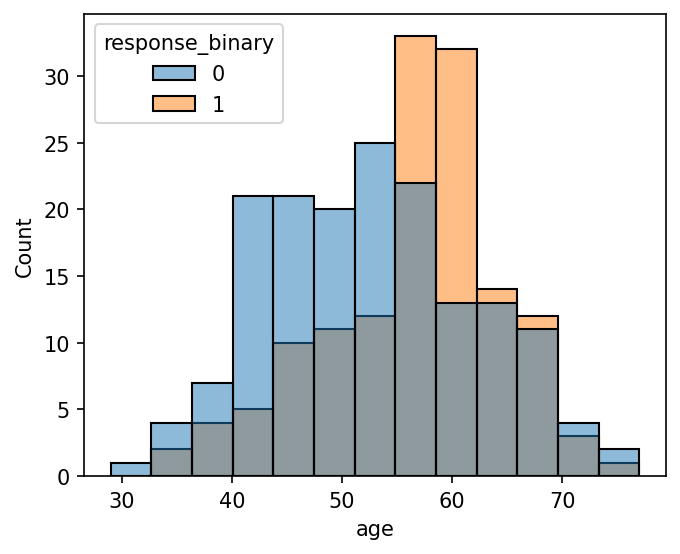

In [55]:
# Age by response
fig, ax = plt.subplots(dpi = 150, figsize = (5,4))
sns.histplot(data = df, x = 'age', ax = ax, hue = 'response_binary')
plt.show()

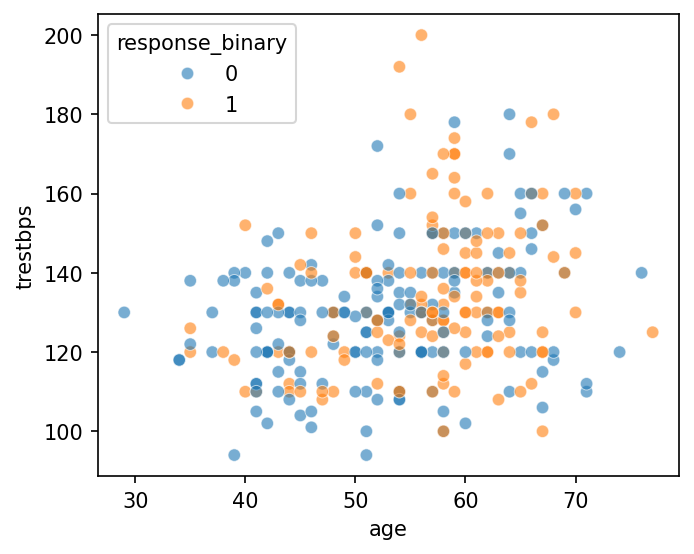

In [61]:
fig, ax = plt.subplots(dpi = 150, figsize = (5,4))
sns.scatterplot(data = df, x = 'age', y = 'trestbps', hue = 'response_binary', alpha = 0.6)
plt.show()

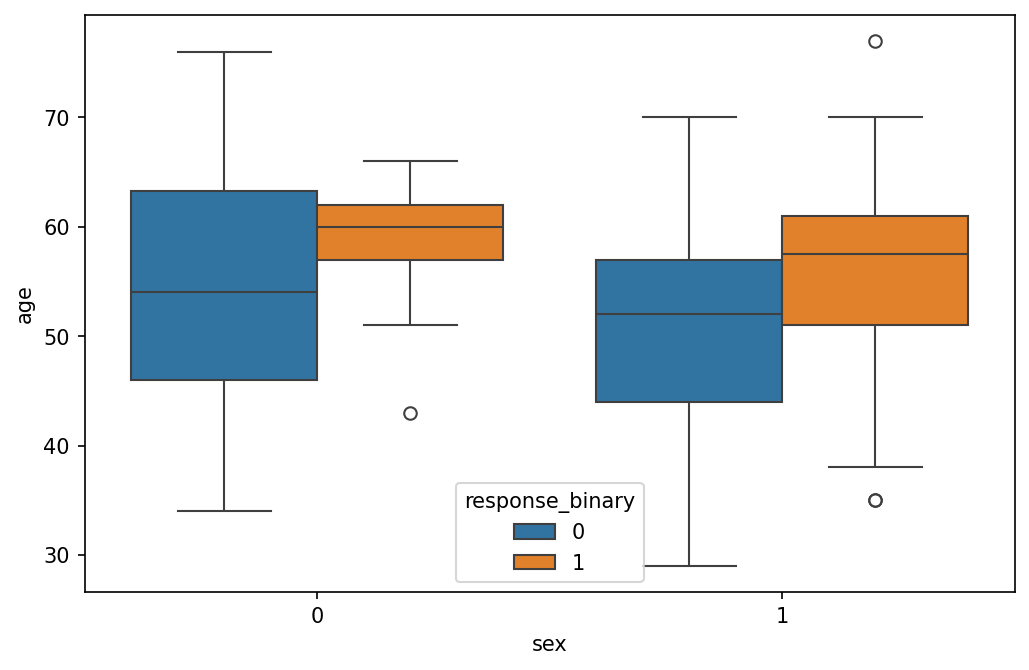

In [65]:
fig, ax = plt.subplots(dpi = 150, figsize = (8,5))
sns.boxplot(data = df, x = 'sex', y = 'age', hue = 'response_binary')
plt.show()